In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
from google.colab import files
upload=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [3]:
crime = pd.read_csv('crime_data.csv')

In [4]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime_2=pd.get_dummies(crime,columns=['Unnamed: 0'])
crime_2

,Murder,Assault,UrbanPop,Rape,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,Unnamed: 0_Colorado,...,Unnamed: 0_South Dakota,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.9,204,78,38.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5.9,238,72,15.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15.4,335,80,31.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17.4,211,60,25.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Murder                     50 non-null     float64
 1   Assault                    50 non-null     int64  
 2   UrbanPop                   50 non-null     int64  
 3   Rape                       50 non-null     float64
 4   Unnamed: 0_Alabama         50 non-null     uint8  
 5   Unnamed: 0_Alaska          50 non-null     uint8  
 6   Unnamed: 0_Arizona         50 non-null     uint8  
 7   Unnamed: 0_Arkansas        50 non-null     uint8  
 8   Unnamed: 0_California      50 non-null     uint8  
 9   Unnamed: 0_Colorado        50 non-null     uint8  
 10  Unnamed: 0_Connecticut     50 non-null     uint8  
 11  Unnamed: 0_Delaware        50 non-null     uint8  
 12  Unnamed: 0_Florida         50 non-null     uint8  
 13  Unnamed: 0_Georgia         50 non-null     uint8  
 

##**NORMALIZATION**

In [8]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [9]:
df_norm = minmax_func(crime_2)
df_norm

,Murder,Assault,UrbanPop,Rape,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,Unnamed: 0_Colorado,...,Unnamed: 0_South Dakota,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming
0,0.746988,0.654110,0.440678,0.359173,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.554217,0.746575,0.271186,0.961240,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493976,0.791096,1.000000,0.860465,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.427711,0.544521,0.779661,0.811370,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.150602,0.222603,0.762712,0.098191,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.307229,0.660959,0.677966,0.219638,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.879518,0.993151,0.813559,0.635659,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.568493,0.474576,0.478036,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


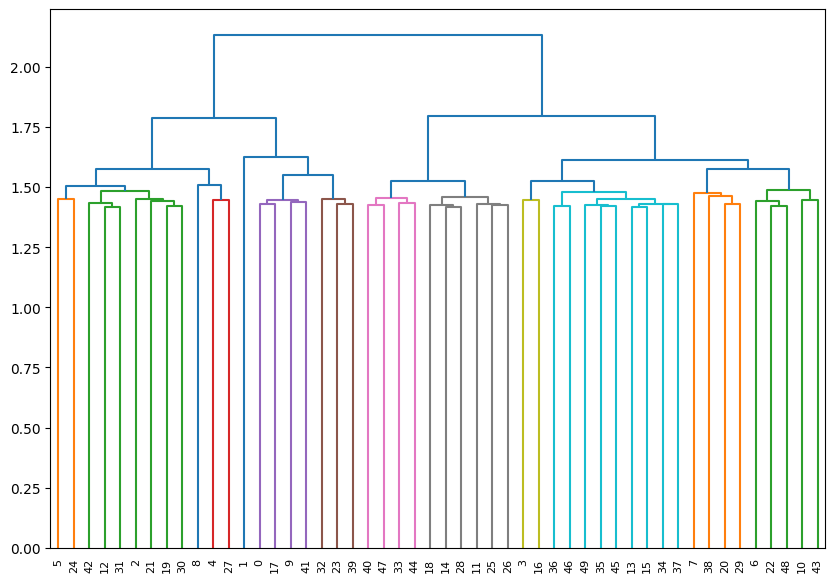

In [10]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

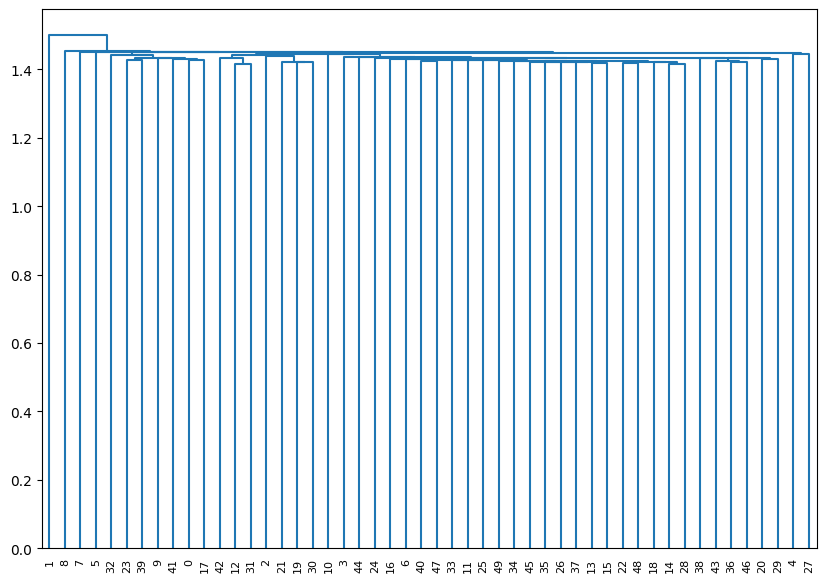

In [11]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

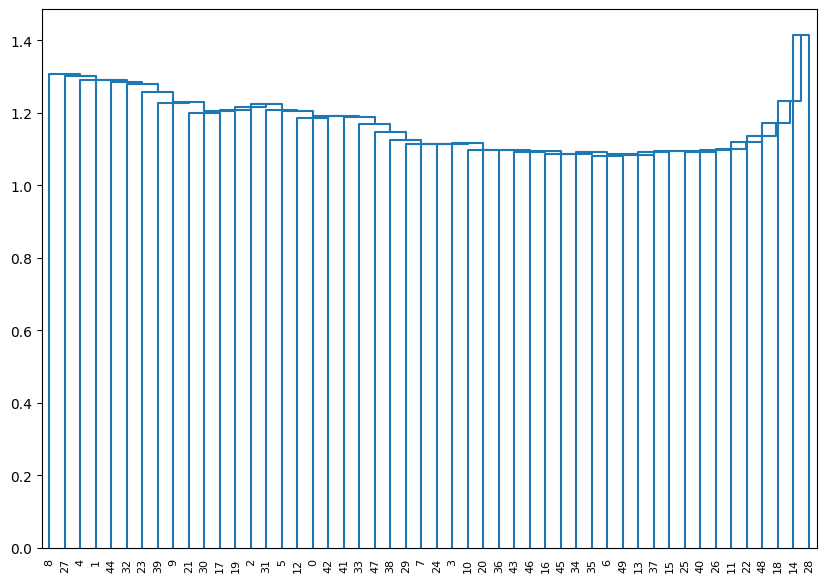

In [12]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

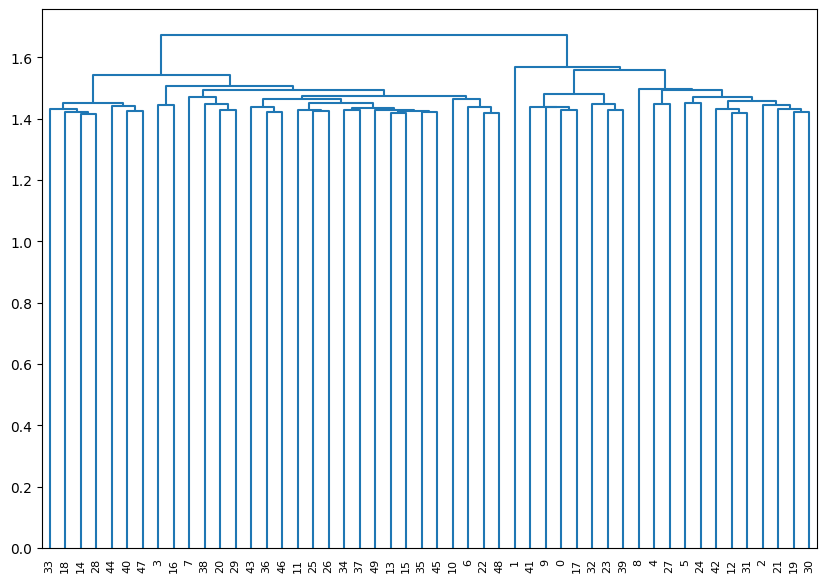

In [13]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [14]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [15]:
hclusters = hclusters.fit_predict(df_norm)
hclusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 0, 0, 4, 0, 0, 1, 1, 0, 3, 1, 2, 0, 4, 2, 4, 4, 3, 2, 0, 1, 0,
       2, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 4, 4, 1, 4, 1, 3, 2, 3, 0, 1,
       2, 4, 1, 2, 2, 4])

In [16]:
crime['h_cluster_id'] = hclusters
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [17]:
crime[crime['h_cluster_id']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0


In [18]:
crime[crime['h_cluster_id']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
20,Massachusetts,4.4,149,85,16.3,1
29,New Jersey,7.4,159,89,18.8,1
36,Oregon,4.9,159,67,29.3,1
38,Rhode Island,3.4,174,87,8.3,1
43,Utah,3.2,120,80,22.9,1
46,Washington,4.0,145,73,26.2,1


In [19]:
crime[crime['h_cluster_id']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [20]:
crime[crime['h_cluster_id']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [21]:
crime[crime['h_cluster_id']==4]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
3,Arkansas,8.8,190,50,19.5,4
13,Indiana,7.2,113,65,21.0,4
15,Kansas,6.0,115,66,18.0,4
16,Kentucky,9.7,109,52,16.3,4
34,Ohio,7.3,120,75,21.4,4
35,Oklahoma,6.6,151,68,20.0,4
37,Pennsylvania,6.3,106,72,14.9,4
45,Virginia,8.5,156,63,20.7,4
49,Wyoming,6.8,161,60,15.6,4


In [22]:
crime.groupby('h_cluster_id').mean()

<ipython-input-22-c3a0e4f34976>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby('h_cluster_id').mean()


,Murder,Assault,UrbanPop,Rape
h_cluster_id,,,,
0,10.815385,257.384615,76.000000,33.192308
1,4.644444,144.444444,79.222222,18.766667
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714
4,7.466667,135.666667,63.444444,18.600000


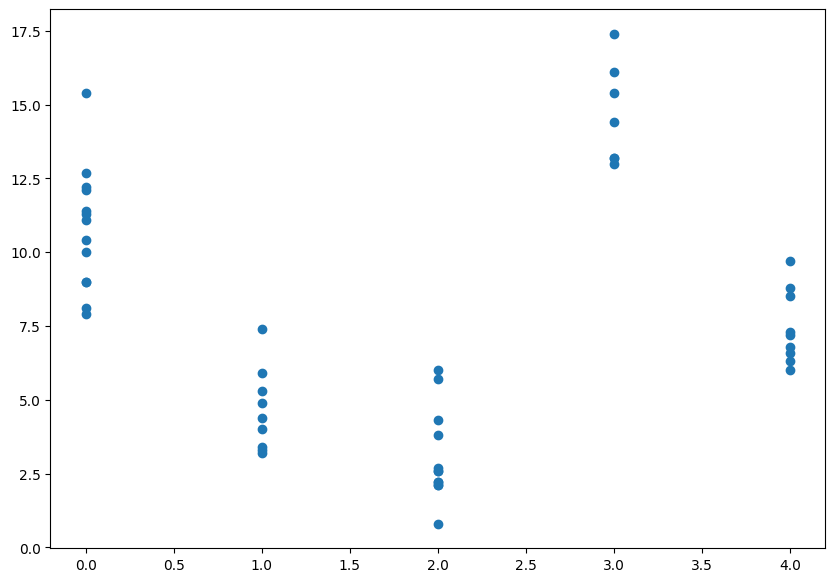

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(crime['h_cluster_id'],crime['Murder'])

##**KMEANS**

In [26]:
def norm_func(i):
  x=(i-i.mean())/(i.std())
  return(x)

In [27]:
x = norm_func(crime_2)
x

,Murder,Assault,UrbanPop,Rape,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,Unnamed: 0_Colorado,...,Unnamed: 0_South Dakota,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming
0,1.242564,0.782839,-0.520907,-0.003416,6.929646,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
1,0.507862,1.106823,-1.211764,2.484203,-0.141421,6.929646,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
2,0.071633,1.478803,0.998980,1.042878,-0.141421,-0.141421,6.929646,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
3,0.232349,0.230868,-1.073593,-0.184917,-0.141421,-0.141421,-0.141421,6.929646,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
4,0.278268,1.262814,1.758923,2.067820,-0.141421,-0.141421,-0.141421,-0.141421,6.929646,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
5,0.025715,0.398859,0.860809,1.864967,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,6.929646,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
6,-1.030419,-0.729082,0.791723,-1.081741,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
7,-0.433474,0.806838,0.446294,-0.579946,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
8,1.747671,1.970778,0.998980,1.138967,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
9,2.206860,0.482855,-0.382735,0.487702,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421


In [31]:
#normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime_2)

In [32]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.51301858,  1.11805959, -1.22406668, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.07236067,  1.49381682,  1.00912225, ..., -0.14285714,
        -0.14285714, -0.14285714],
       ...,
       [-0.48425985, -1.08799901, -1.85215107, ...,  7.        ,
        -0.14285714, -0.14285714],
       [-1.20322802, -1.42739264,  0.03210209, ..., -0.14285714,
         7.        , -0.14285714],
       [-0.22914211, -0.11830292, -0.38662083, ..., -0.14285714,
        -0.14285714,  7.        ]])

##**ELBOW CHART**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2646.0000000000005, 2505.5831719890994, 2429.3905341108075, 2363.5390154288266, 2303.8385231650273, 2247.151401523089, 2192.5858351651514, 2137.2173324379833, 2085.186019210724, 2033.5225263143066]


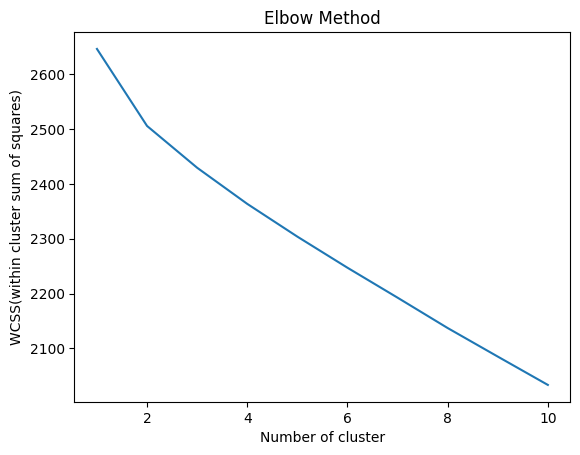

In [50]:
from sklearn.cluster import KMeans
#WCSS(within cluster sum of square)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS(within cluster sum of squares)')
plt.show()

In [51]:
k_mean_clust = KMeans(4, random_state=0)
k_mean_clust.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [53]:
k_mean_clust.labels_

array([3, 1, 1, 0, 1, 1, 2, 0, 1, 3, 0, 0, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 0, 0, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [56]:
crime_2['Kmean_clust_id'] = k_mean_clust.labels_
crime_2

,Murder,Assault,UrbanPop,Rape,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,Unnamed: 0_Colorado,...,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming,Kmean_clust_id
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,7.9,204,78,38.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,5.9,238,72,15.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15.4,335,80,31.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,17.4,211,60,25.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [57]:
crime_2.groupby('Kmean_clust_id').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,Unnamed: 0_Colorado,...,Unnamed: 0_South Dakota,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmean_clust_id,,,,,,,,,,,,,,,,,,,,,
0,5.930000,137.100000,68.800000,18.615000,0.000,0.000000,0.000000,0.05,0.000000,0.000000,...,0.0,0.000,0.000,0.05,0.0,0.05,0.05,0.0,0.0,0.05
1,10.658333,262.083333,75.666667,33.833333,0.000,0.083333,0.083333,0.00,0.083333,0.083333,...,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.00
2,2.750000,69.100000,53.300000,10.600000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.1,0.000,0.000,0.00,0.1,0.00,0.00,0.1,0.1,0.00
3,14.425000,245.000000,57.500000,22.162500,0.125,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.125,0.125,0.00,0.0,0.00,0.00,0.0,0.0,0.00


##**DBSCAN**

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
upload=files.upload()

Saving crime_data.csv to crime_data (2).csv


In [128]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [129]:
crime.drop(['Unnamed: 0'],axis=1, inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [130]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [141]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [142]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [143]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [144]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


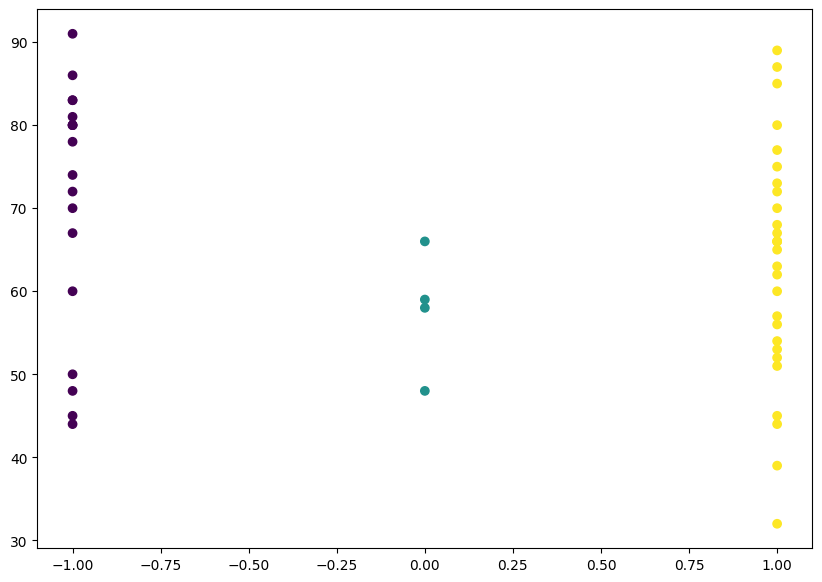

In [145]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)

In [146]:
(len(crime[crime['clusters']==-1])/len(crime))*100

36.0

In [147]:
X=metrics.silhouette_score(x,dbscan.labels_)
X

0.013113830335277361